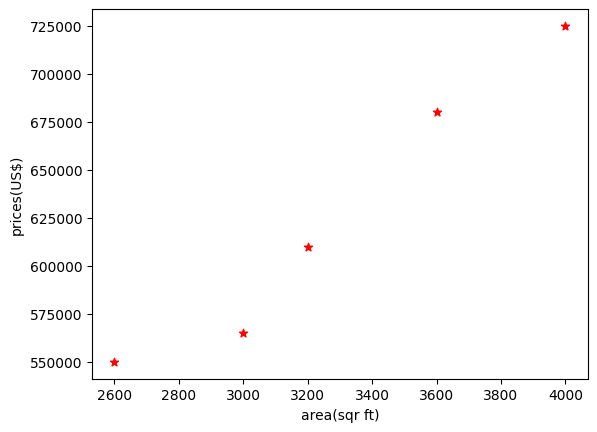

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv("homeprices.csv")
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('prices(US$)')
plt.scatter(df.area,df.price,color='red',marker='*')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

np.float64(180616.43835616432)

In [ ]:
135.78767123*5000+180616.43835616432

859554.7945061643

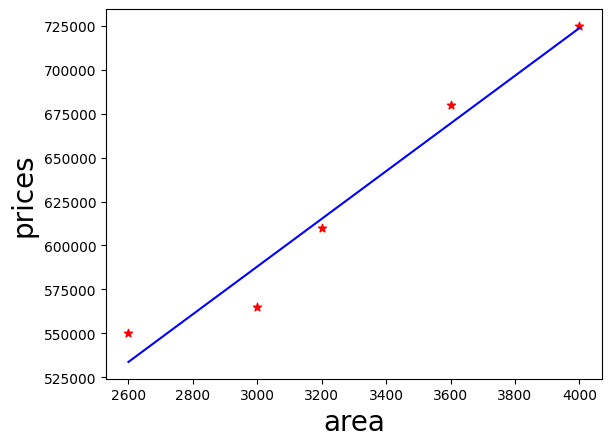

In [ ]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('prices', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')


In [ ]:
d = pd.read_csv("areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [ ]:
p = reg.predict(d)

In [ ]:
print(p)

[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959]


In [ ]:
d['prices'] = p

In [ ]:
d.to_csv("prediction.csv",index=False)

In [ ]:
import pickle
with open('reg_pickle','wb') as f:
  pickle.dump(reg,f)
with open('reg_pickle','rb') as f:
  mp = pickle.load(f)
mp.predict([[5000]])
from sklearn.externals import joblib # Corrected 'jolib' to 'joblib'
joblib.dump(reg, 'model_joblib') # Changed 'model' to 'reg'
mj = joblib.load('model_joblib')